In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from torch import nn

from unityagents import UnityEnvironment
from agent import PPOAgent
from trainer import PPOTrainer


In [2]:
env = UnityEnvironment(file_name='/Users/claudiocoppola/code/RL_repos/Reacher.app', no_graphics=True)
agent = PPOAgent(env, network_config={'hidden_sizes':[256, 512, 256], 'hidden_activation': nn.Tanh, 'action_std': 5e-1})
agent.policy.pi

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
INFO:agent:	------------------------------- Params -------------------------------
INFO:agent:	State dimension: 33	 Action dimension: 4	 Action Limit: 1.0
INFO:agent:	Network hidden units: [256, 256] -> Total hidden weights: 65536
INFO:agent:	Network hidden activations: <class 'torch.nn.modules.activation.ReLU'>
INFO:agent:	Network output activation: <class 'torch.nn.modules.activation.Tan

Sequential(
  (0): Sequential(
    (0): Linear(in_features=33, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
  )
  (1): Sequential(
    (0): Linear(in_features=256, out_features=4, bias=True)
    (1): Tanh()
  )
)

INFO:trainer:	------------------------------- Params -------------------------------
INFO:trainer:	Epsilon clip: 0.1	 Gamma: 0.99	 Learning Rate: 0.001
INFO:trainer:	Training epochs: 40 
INFO:trainer:	Using Normalized Advantage: True 
INFO:trainer:	Using General Advantage Estimation: True 
INFO:trainer:	----------------------------------------------------------------------
DEBUG:trainer:Debug mode is : ON
INFO:trainer:	------------------------------ Training ------------------------------
INFO:trainer:	N Episodes 1000 , max length episode: 3000
INFO:trainer:	Update every 512 episodes
INFO:trainer:	Print every 100 episodes
INFO:trainer:	Target score: 30.0
INFO:trainer:	----------------------------------------------------------------------
DEBUG:trainer:	Updating the nework ...
DEBUG:trainer:	Epoch: 0, actor_loss: 0.017539311200380325, critic_loss: 1.1769191026687622, entropy_bonus: 12.113506317138672
DEBUG:trainer:	Epoch: 1, actor_loss: 0.017513994127511978, critic_loss: 1.0542184114456

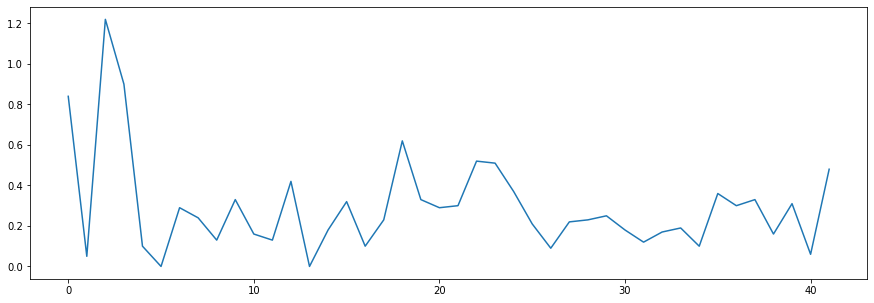

In [3]:
trainer = PPOTrainer(agent, gamma=0.99, epsilon_clip=0.1, training_epochs=40, use_generalized_advantage=True)
trainer.toggle_debug()
scores = trainer.train(n_episodes=1000, max_t=3000, update_every=512)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(scores)

plt.show()

/Users/claudiocoppola/code/RL_repos/DeepRL_Continuous_Control/src/model/ppo/trainer.py:169: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(self.gae_lambda is not None, "If compute_general_advantage is set to True a gae_lambda value should be provided")


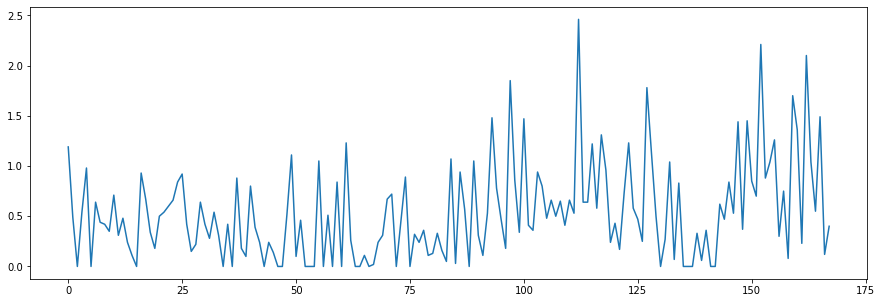

In [ ]:

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(scores)

plt.show()

In [ ]:
agent.run_episode(200)

([tensor(1.00000e-20 *
         [ 6.9490]),
  tensor(1.00000e-23 *
         [ 3.9557]),
  tensor(1.00000e-26 *
         [ 7.3823]),
  tensor(1.00000e-26 *
         [ 4.6146]),
  tensor(1.00000e-24 *
         [ 5.8462]),
  tensor(1.00000e-23 *
         [ 5.9610]),
  tensor(1.00000e-22 *
         [ 7.2304]),
  tensor(1.00000e-18 *
         [ 1.5306]),
  tensor(1.00000e-17 *
         [ 3.6076]),
  tensor(1.00000e-16 *
         [ 5.7379]),
  tensor(1.00000e-18 *
         [ 1.2030]),
  tensor(1.00000e-19 *
         [ 1.1173]),
  tensor(1.00000e-22 *
         [ 1.1839]),
  tensor(1.00000e-25 *
         [ 3.8378]),
  tensor(1.00000e-20 *
         [ 3.0209]),
  tensor(1.00000e-16 *
         [ 3.0920]),
  tensor(1.00000e-18 *
         [ 3.7784]),
  tensor(1.00000e-16 *
         [ 1.8243]),
  tensor(1.00000e-13 *
         [ 3.4179]),
  tensor(1.00000e-11 *
         [ 1.5415]),
  tensor(1.00000e-11 *
         [ 1.2779]),
  tensor(1.00000e-12 *
         [ 3.5160]),
  tensor(1.00000e-13 *
         

In [ ]:
trainer.agent.policy.save_model('./checkpoint.pth')

In [ ]:
PPOAgent.from_file(env, './checkpoint.pth')

TypeError: __init__() got an unexpected keyword argument 'action_std'